In [1]:
using OrdinaryDiffEq
using Plots
using NLsolve
;

INFO: Recompiling stale cache file /Users/briannguyen/.julia/lib/v0.6/Plots.ji for module Plots.


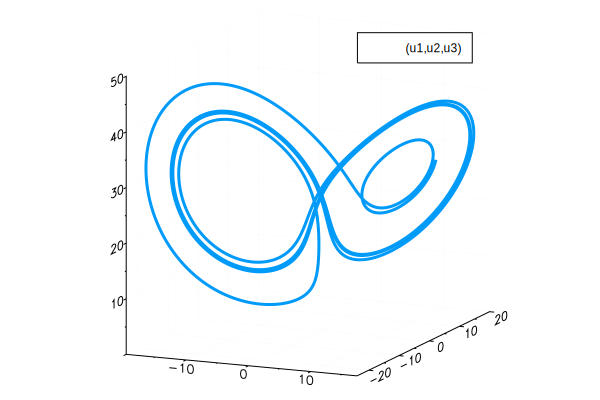

In [2]:
function lorenz(dx,x,p,t)
    x = copy(x)
    
    #the parameters for the lorenz system is defined here
    σ = 10
    β = 8/3
    ρ = 28
    
    #the lorenz system is defined here
    dx[1] = σ*(x[2]-x[1])
    dx[2] = x[1]*(ρ-x[3])-x[2]
    dx[3] = x[1]*x[2]-(β*x[3])
end
x0 = [-13.763610682134; -19.578751942452; 27.0]
tspan = (0.0,21.0)
using OrdinaryDiffEq
prob = ODEProblem(lorenz,x0,tspan)
sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)
plot(sol,vars=(1,2,3))

In [10]:
function g(x)
    x0 = copy(x)
    tspan = (0.0,x0[4])
    
    #The lorenz system is computed here
    prob = ODEProblem(lorenz,x0[1:3],tspan)
    sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)
    
    #the function to find the periodic orbit of the function is defined here
    result = zeros(x0)
    result[1:3] = sol[end] - x0[1:3]
    result[4] = x0[3] - 27
    result
end

g (generic function with 2 methods)

In [11]:
function dg(x0)
    x = copy(x0)
    x0 = copy(x0)
    fx0 = g(x0)
    m = length(fx0)
    ϵ = 0.01
    df = zeros(m,m)
    n = 10
    cnt = 0
    for Niterations = 1:n
        #here the derivative is calculated numerically
        for j = 1:m
            x_ϵ = copy(x0)
            
            x_ϵ[j] += ϵ
        
            fx_ϵ = g(x_ϵ)
        
            for i = 1:m
                df[i,j] = (fx_ϵ[i] - fx0[i])/ϵ
            end
        end
    end
    df
end

dg (generic function with 2 methods)

In [12]:
using NLsolve
x0 = [-13.763610682134; -19.578751942452; 27; 1.5500]
# to ask the package to use the newton method, I enter 'mmethod = :newton'
# the package asks for the residuals of the system as a function 
# to ask the package to find the root of the system itself, I enter 'inplace = false'
nlsolve(g,dg,x0,method = :newton; inplace = false)

Results of Nonlinear Solver Algorithm
 * Algorithm: Newton with line-search
 * Starting Point: [-13.7636, -19.5788, 27.0, 1.55]
 * Zero: [-13.7636, -19.5788, 27.0, 1.55865]
 * Inf-norm of residuals: 0.000000
 * Iterations: 21
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 22
 * Jacobian Calls (df/dx): 21